In [1]:
import numpy as np
import matplotlib.pyplot as plt
import a405thermo.rootfinder as rf
plt.style.use("ggplot")

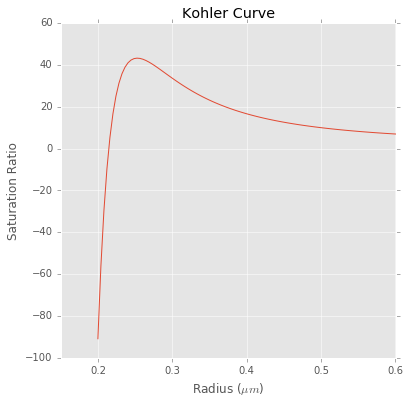

In [2]:
%matplotlib inline

# constants
temp = 273.15
sigma = 7.5e-2
rho_l = 1.
Rv = 461

a_param = 2*sigma/(rho_l*Rv*temp)

radii = np.linspace(0.2e-6,0.6e-6,100)

# hold ns constant, vary nw with radius
ns = 2.3e-18
nw = (rho_l*(4/3)*np.pi*radii**3)/0.018

# solute term
aw = 1 - ns/nw

# saturation ratio
sat_rat = aw*np.exp(a_param/(radii))

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(radii*1e6, sat_rat)
ax.set_title("Kohler Curve")
ax.set_xlabel(r"Radius ($\mu m$)")
ax.set_ylabel(r"Saturation Ratio")

In [3]:
def calc_kohler(r_guess, temp, rh):
    """Calculate Kohler curve by rootfind
        Input:
            r_guess, (m)
            temp, (K)
            rh, relative humidity
            
        Output:
            rh - rh_guess
    """
    sigma = 7.5e-2
    rho_l = 1.
    Rv = 461
    rho_l = 1
    water_mol = 0.018
    ns = 2.3e-18 # assume constant
    
    a_param = 2*sigma/(rho_l*Rv*temp)   
    nw = (rho_l*4/3*np.pi*r_guess**3)/water_mol
    aw = 1 - ns/nw # solute term
    
    rh_guess = aw*np.exp(a_param/(r_guess))
    
    return rh-rh_guess

radius = 0.2e-6 # centre guess around here
rh = 0.9
temp = 15 + 273.15
brackets = rf.find_interval(calc_kohler, radius, temp, rh)

equi_rad = rf.fzero(calc_kohler, brackets, temp, rh)
print("The equilibrium radius is {:.3} microns".format(equi_rad*1e6))

The equilibrium radius is 0.215 microns
